# MNIST 数据库

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats('svg')

In [3]:
mnist_train = datasets.MNIST(
  root="../data",
  train=True,
  transform=transforms.ToTensor(),
  download=True
)

mnist_test = datasets.MNIST(
  root="../data",
  train=False,
  transform=transforms.ToTensor(),
  download=True
)

In [4]:
batch_size = 32

train_iter = DataLoader(mnist_train, batch_size, shuffle=True)
test_iter = DataLoader(mnist_test, batch_size, shuffle=False)

In [112]:
def load_mnist(batch_size):
  mnist_train = datasets.MNIST(
    root="../data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
  )
  mnist_test = datasets.MNIST(
      root="../data",
      train=False,
      transform=transforms.ToTensor(),
      download=True
    )
  train_iter = DataLoader(mnist_train, batch_size, shuffle=True)
  test_iter = DataLoader(mnist_test, batch_size, shuffle=False)
  return train_iter, test_iter

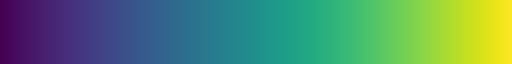

In [13]:
plt.get_cmap()

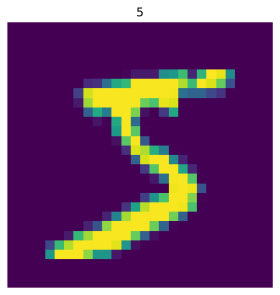

In [18]:
img_0 = mnist_train[0][0]
title_0 = mnist_train[0][1]

plt.imshow(img_0[0])
plt.axis('off')
plt.title(title_0)
plt.show()

(-0.5, 27.5, 27.5, -0.5)

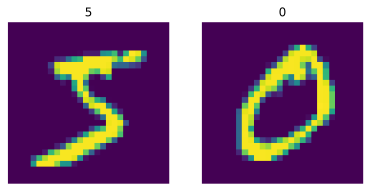

In [39]:
img_1, title_1 = mnist_train[1]
_, axes = plt.subplots(1,2)
axes[0].imshow(img_0[0])
axes[0].axis('off')
axes[0].set_title(title_0)
axes[1].imshow(img_1[0])
axes[1].set_title(title_1)
axes[1].axis('off')

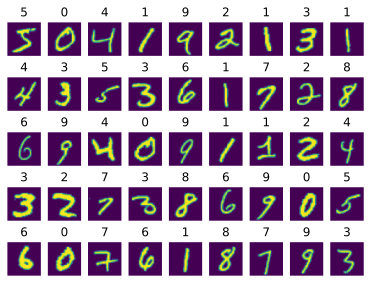

In [81]:
imgs, titles = next(iter(DataLoader(mnist_train, batch_size=45)))
_, axes = plt.subplots(5,9)
axes = axes.flatten()
for i, (ax, img) in enumerate(zip(axes, imgs.reshape(45,28,28))):
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(int(titles[i]))

In [82]:
from torch import nn

In [83]:
net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(28*28, 10)
)

In [84]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight,std=0.01)

In [85]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [87]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [99]:
loss = nn.CrossEntropyLoss()

In [91]:
net.train()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [103]:
isinstance(net, nn.Module)

True

In [94]:
isinstance(trainer, torch.optim.Optimizer)

True

In [109]:
for X, y in train_iter:
  y_hat = net(X)
  l = loss(y_hat, y)
  trainer.zero_grad()
  l.backward()
  trainer.step()

In [102]:
def accuracy(y_hat, y):
  y_hat = y_hat.argmax(dim=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [107]:
def evaluate_accuracy(net, data_iter):
  net.eval()
  num_correct = 0
  num_total = 0
  with torch.no_grad():
    for X, y in data_iter:
      num_correct += accuracy(net(X), y)
      num_total += y.numel()
  return num_correct / num_total

In [110]:
evaluate_accuracy(net, test_iter)

0.9221

In [111]:
num_epochs = 10
for epoch in range(num_epochs):
  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  acc = evaluate_accuracy(net, test_iter)
  print(f'epoch {epoch + 1}, accuracy {acc:f}')

epoch 1, accuracy 0.921600
epoch 2, accuracy 0.922400
epoch 3, accuracy 0.922000
epoch 4, accuracy 0.922400
epoch 5, accuracy 0.921800
epoch 6, accuracy 0.922000
epoch 7, accuracy 0.922500
epoch 8, accuracy 0.921800
epoch 9, accuracy 0.922600
epoch 10, accuracy 0.922800


In [117]:
## 数据集
batch_size = 256
train_iter, test_iter = load_mnist(batch_size)

## 模型
net = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight,std=0.01)
    
net.apply(init_weights)

## 损失函数
loss = nn.CrossEntropyLoss()

## 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

## 训练
num_epochs = 100
for epoch in range(num_epochs):
  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  acc = evaluate_accuracy(net, test_iter)
  print(f'epoch {epoch + 1}, accuracy {acc:f}')


epoch 1, accuracy 0.822400
epoch 2, accuracy 0.847800
epoch 3, accuracy 0.861500
epoch 4, accuracy 0.870200
epoch 5, accuracy 0.874500
epoch 6, accuracy 0.879000
epoch 7, accuracy 0.881300
epoch 8, accuracy 0.883900
epoch 9, accuracy 0.885600
epoch 10, accuracy 0.888500
epoch 11, accuracy 0.889900
epoch 12, accuracy 0.891500
epoch 13, accuracy 0.893100
epoch 14, accuracy 0.894700
epoch 15, accuracy 0.895900
epoch 16, accuracy 0.896600
epoch 17, accuracy 0.898000
epoch 18, accuracy 0.899200
epoch 19, accuracy 0.899400
epoch 20, accuracy 0.900800
epoch 21, accuracy 0.901400
epoch 22, accuracy 0.902200
epoch 23, accuracy 0.902200
epoch 24, accuracy 0.903000
epoch 25, accuracy 0.903000
epoch 26, accuracy 0.903700
epoch 27, accuracy 0.904800
epoch 28, accuracy 0.904800
epoch 29, accuracy 0.905600
epoch 30, accuracy 0.905500
epoch 31, accuracy 0.906500
epoch 32, accuracy 0.906400
epoch 33, accuracy 0.907300
epoch 34, accuracy 0.908000
epoch 35, accuracy 0.908200
epoch 36, accuracy 0.908300
e

## 整理

In [1]:
import torch
import torchvision

from torch import nn

from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats('svg')

## 超参数
num_inputs = 28*28
num_outputs = 10
batch_size = 256
learning_rate = 0.1
num_epochs = 10

## 导入MNIST数据
trans = torchvision.transforms.ToTensor()

def load_mnist(batch_size):
  mnist_train = torchvision.datasets.MNIST(root="../data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.MNIST(root="../data", train=False, transform=trans, download=True)
  train_iter = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True)
  test_iter = torch.utils.data.DataLoader(mnist_test, batch_size, shuffle=False)
  return train_iter, test_iter

## 准确度
def accuracy(y_hat, y):
  y_hat = y_hat.argmax(dim=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

def evaluate_accuracy(net, data_iter):
  net.eval()
  num_correct = 0
  num_total = 0
  with torch.no_grad():
    for X, y in data_iter:
      num_correct += accuracy(net(X), y)
      num_total += y.numel()
  return num_correct / num_total

## 参数初始化
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight,std=0.01)

## 训练（一个迭代周期）
def train_epoch(net, train_iter, loss, updater):
  net.train()
  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    updater.zero_grad()
    l.backward()
    updater.step()

## 训练模型
def train(net, train_iter, test_iter, loss, num_epochs, updater):
  for epoch in range(num_epochs):
    train_epoch(net, train_iter, loss, updater)
    acc = evaluate_accuracy(net, test_iter)
    print(f'epoch {epoch + 1}, accuracy {acc:f}')
    
def main():
  ## 数据集
  train_iter, test_iter = load_mnist(batch_size)

  ## 模型
  net = nn.Sequential(nn.Flatten(),
                      nn.Linear(num_inputs, num_outputs))
  net.apply(init_weights)

  ## 损失函数
  loss = nn.CrossEntropyLoss()

  ## 优化算法
  trainer = torch.optim.SGD(net.parameters(), lr=learning_rate)

  ## 训练
  train(net, train_iter, test_iter, loss, num_epochs, trainer)

## 数据集可视化
def show_images(imgs, num_rows, num_cols, titles=None):
  _, axes = plt.subplots(num_rows, num_cols)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    ax.imshow(img)
    ax.axis('off')
    if titles:
      ax.set_title(titles[i])
  return axes

def show_mnist(num_rows, num_cols):
  fig_size = num_rows * num_cols
  train_iter, _ = load_mnist(batch_size=fig_size)
  for X, y in train_iter:
    break
  show_images(X.reshape(fig_size, 28, 28), num_rows, num_cols, titles=list(y.numpy()))

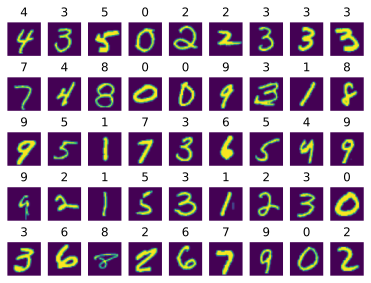

In [2]:
show_mnist(5,9)

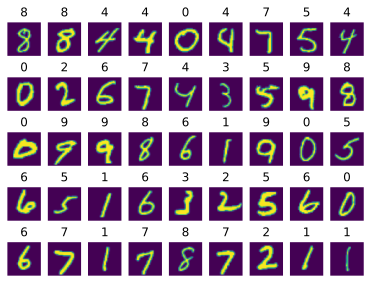

In [3]:
show_mnist(5,9)

In [4]:
main()

epoch 1, accuracy 0.888300
epoch 2, accuracy 0.900400
epoch 3, accuracy 0.905300
epoch 4, accuracy 0.909400
epoch 5, accuracy 0.912200
epoch 6, accuracy 0.913700
epoch 7, accuracy 0.914900
epoch 8, accuracy 0.916300
epoch 9, accuracy 0.915800
epoch 10, accuracy 0.918200


In [8]:
learning_rate = 1

train_iter, test_iter = load_mnist(batch_size)

net = nn.Sequential(nn.Flatten(),
                      nn.Linear(num_inputs, num_outputs))
net.apply(init_weights)

loss = nn.CrossEntropyLoss()

trainer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [9]:
train(net, train_iter, test_iter, loss, num_epochs, trainer)

epoch 1, accuracy 0.913400
epoch 2, accuracy 0.916400
epoch 3, accuracy 0.917200
epoch 4, accuracy 0.917600
epoch 5, accuracy 0.915900
epoch 6, accuracy 0.912600
epoch 7, accuracy 0.923500
epoch 8, accuracy 0.914700
epoch 9, accuracy 0.920400
epoch 10, accuracy 0.923100


In [28]:
def show_predict(net, test_iter, n=9):
  for X, y in test_iter: break
  trues = list(y.numpy())
  preds = list(net(X).argmax(dim=1).numpy())
  titles = [f'{true}\n{pred}' for true, pred in zip(trues, preds)]
  show_images(X[0:n].reshape(n,28,28), 1, n, titles=titles[0:n])

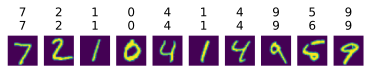

In [32]:
show_predict(net, test_iter, 10)